In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
import pandas as pd

# Define the path to the CSV file
file_path = 'C:/Users/Lenovo/Downloads/covid19pandemic/Financials.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
# display the column names
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [4]:
# removing leading and strailing space
df.columns=df.columns.str.strip()

In [5]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [6]:
# converting values in parentheses to negative numbers
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val
        

In [7]:
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']


In [8]:
# Remove '$', '-' and ',' from the columns, convert values in parentheses to negative numbers, convert empty strings to NaN, and then convert to float
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)


In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the cleaned data
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


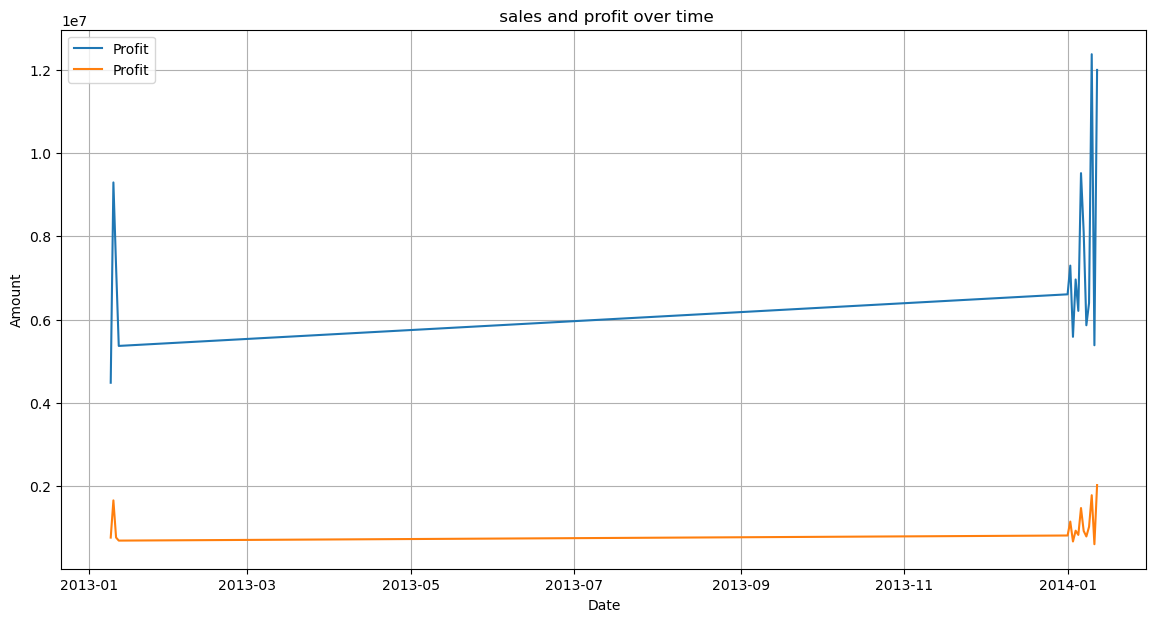

In [14]:
import matplotlib.pyplot as plt

# group data by date
group_df=df.groupby('Date').agg({'Sales':'sum','Profit':'sum'})

#ploting sales and profit over time
plt.figure(figsize=(14, 7))
plt.plot(group_df.index, group_df['Sales'], label='Profit')
plt.plot(group_df.index, group_df['Profit'], label= 'Profit')
plt.title(' sales and profit over time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

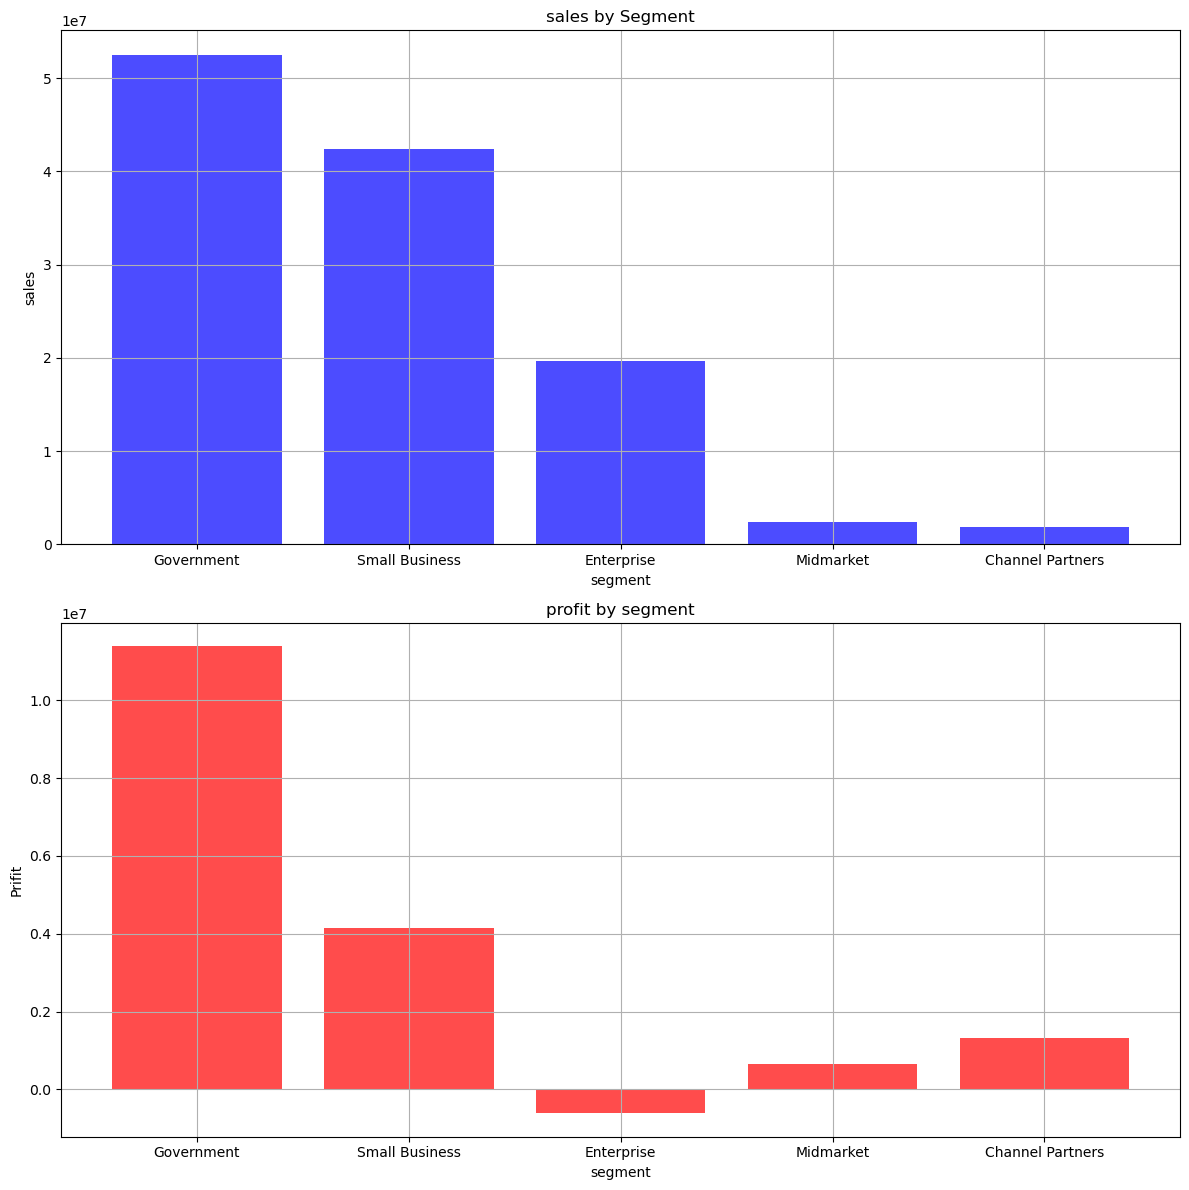

In [32]:
# goup data by segment
group_segment =df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'})
group_segment=group_segment.sort_values(by='Sales', ascending=False)

fig, ax=plt.subplots(2,1, figsize=(12,12))

ax[0].bar(group_segment.index, group_segment['Sales'], color='Blue', alpha=0.7)
ax[0].set_title('sales by Segment')
ax[0].set_xlabel('segment')
ax[0].set_ylabel('sales')
ax[0].grid()

ax[1].bar(group_segment.index, group_segment['Profit'], color='Red', alpha=0.7)
ax[1].set_title('profit by segment')
ax[1].set_xlabel('segment')
ax[1].set_ylabel('Prifit')
ax[1].grid()

plt.tight_layout()
plt.show()

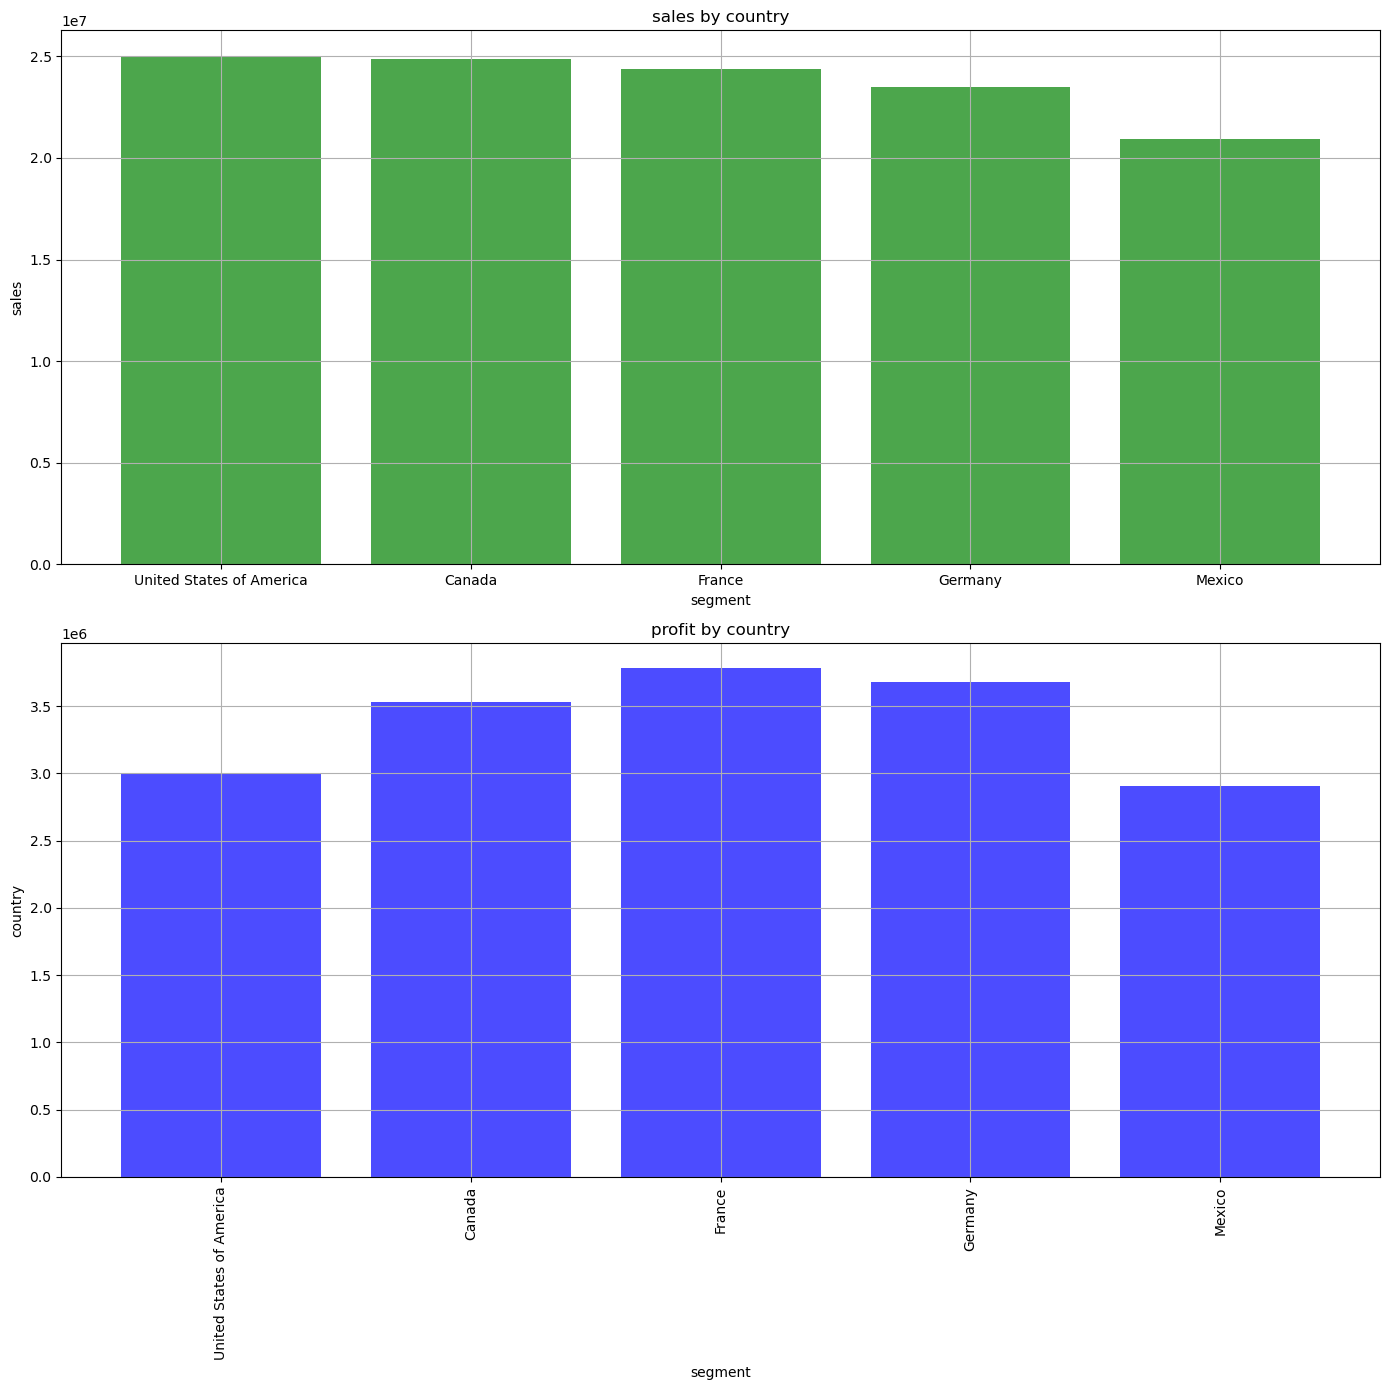

In [29]:
# group data by country
group_country=df.groupby('Country').agg({'Sales':'sum','Profit':'sum'})
group_country= group_country.sort_values(by='Sales', ascending=False)
fig, ax=plt.subplots(2,1, figsize=(14,14))

ax[0].bar(group_country.index, group_country['Sales'], color='Green', alpha=0.7)
ax[0].set_title('sales by country')
ax[0].set_xlabel('segment')
ax[0].set_ylabel('sales')
ax[1].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(group_country.index, group_country['Profit'], color='Blue', alpha=0.7)
ax[1].set_title('profit by country')
ax[1].set_xlabel('segment')
ax[1].set_ylabel('country')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()

In [37]:
# summary statistics for discounts
df['Discounts'].describe()

count       647.000000
mean      14227.586198
std       23562.833079
min          18.410000
25%        1061.000000
50%        3108.000000
75%       18809.250000
max      149677.500000
Name: Discounts, dtype: float64

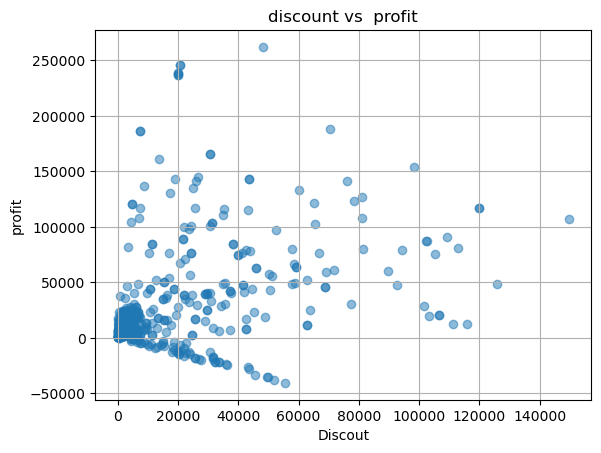

In [41]:
# ceate scatter plot for discount and profit
plt.Figure(figsize=(12,7))
plt.scatter(df['Discounts'], df['Profit'], alpha=0.5)
plt.title('discount vs  profit')
plt.xlabel('Discout')
plt.ylabel('profit')
plt.grid()
plt.show()

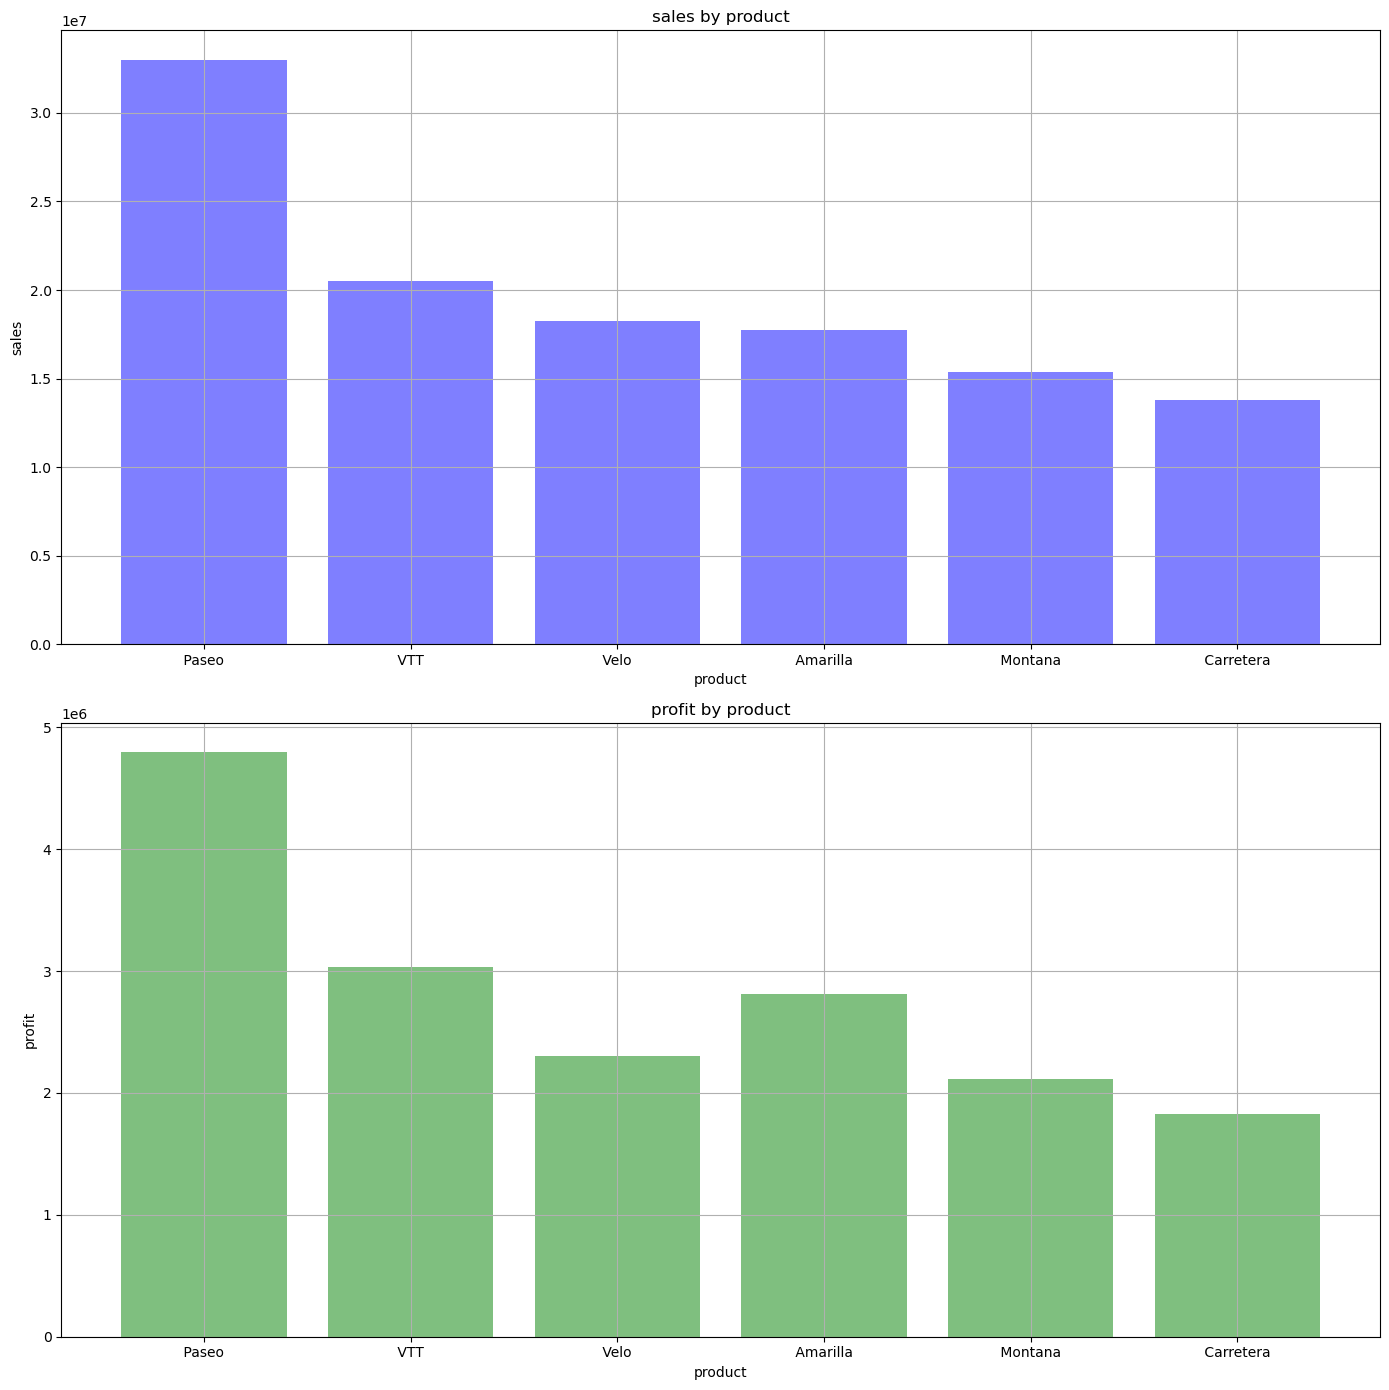

In [44]:
# group data by products
group_product=df.groupby('Product').agg({'Sales':'sum','Profit':'sum'})
group_product=group_product.sort_values(by='Sales', ascending= False)

fig, ax=plt.subplots(2,1,figsize=(14,14))
ax[0].bar(group_product.index, group_product['Sales'], color='Blue',alpha=0.5)
ax[0].set_title('sales by product')
ax[0].set_xlabel('product')
ax[0].set_ylabel('sales')
ax[0].grid()

ax[1].bar(group_product.index, group_product['Profit'], color='Green', alpha=0.5)
ax[1].set_title('profit by product')
ax[1].set_ylabel('profit')
ax[1].set_xlabel('product')
ax[1].grid()

plt.tight_layout()
plt.show()

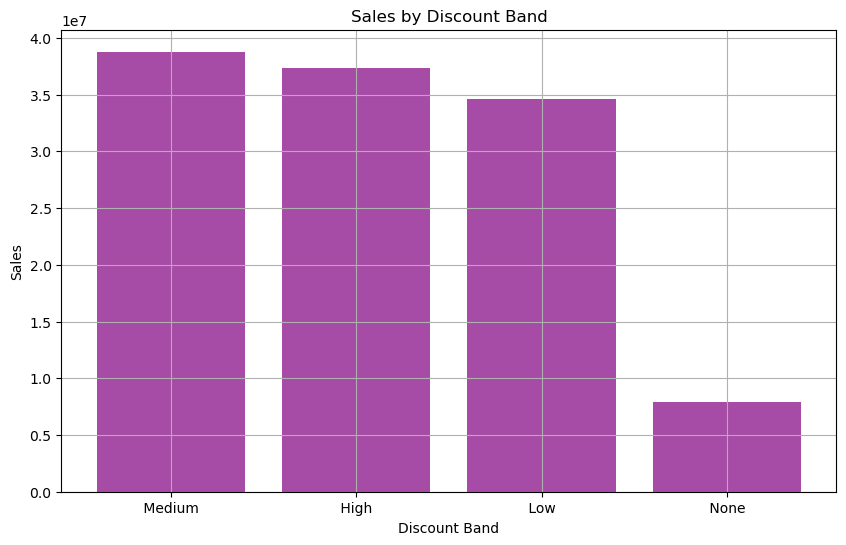

In [45]:
# Group data by Discount Band
grouped_discount = df.groupby('Discount Band').agg({'Sales': 'sum'})

# Sort data by Sales
grouped_discount = grouped_discount.sort_values(by='Sales', ascending=False)

# Plot Sales by Discount Band
plt.figure(figsize=(10, 6))
plt.bar(grouped_discount.index, grouped_discount['Sales'], color='purple', alpha=0.7)
plt.title('Sales by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Sales')
plt.grid()
plt.show()

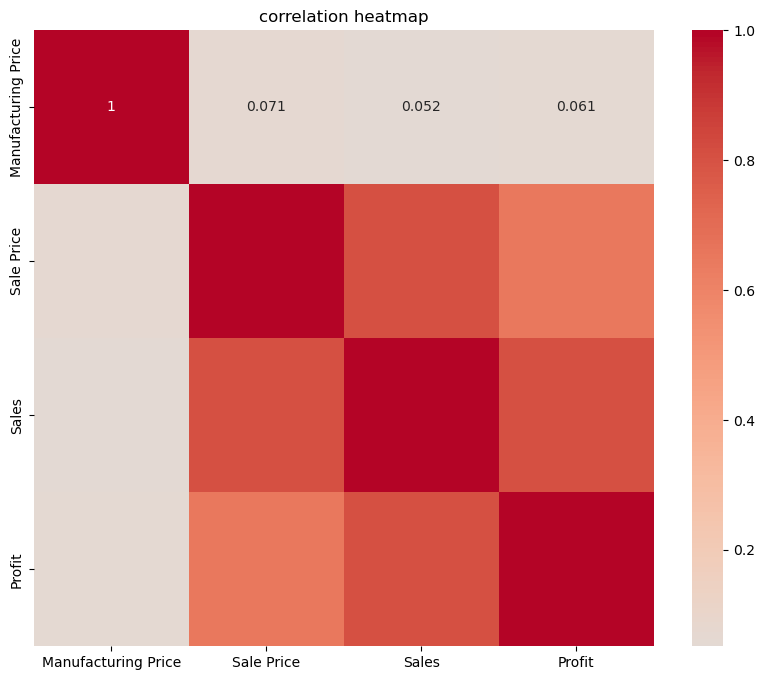

In [48]:
import seaborn as sns
# calculate correlation
correlation=df[['Manufacturing Price','Sale Price','Sales','Profit']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True, cmap='coolwarm', center=0)
plt.title('correlation heatmap')
plt.show()

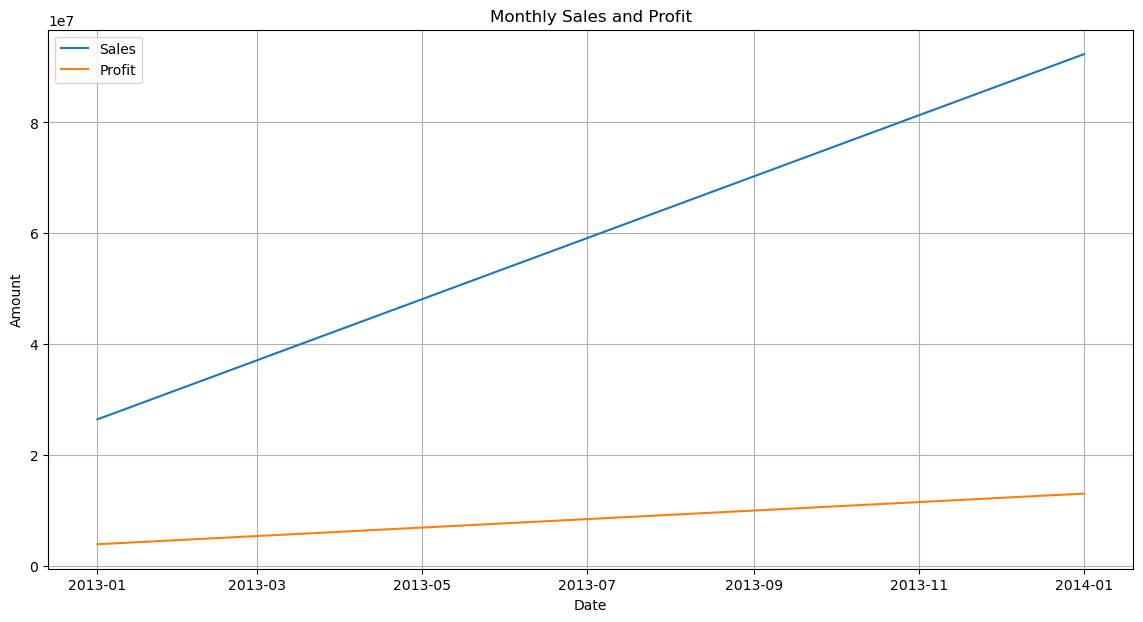

In [50]:
# Create a new dataframe with total monthly sales and profit
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plot monthly sales and profit
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Year-Month'], monthly_data['Sales'], label='Sales')
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'], label='Profit')
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

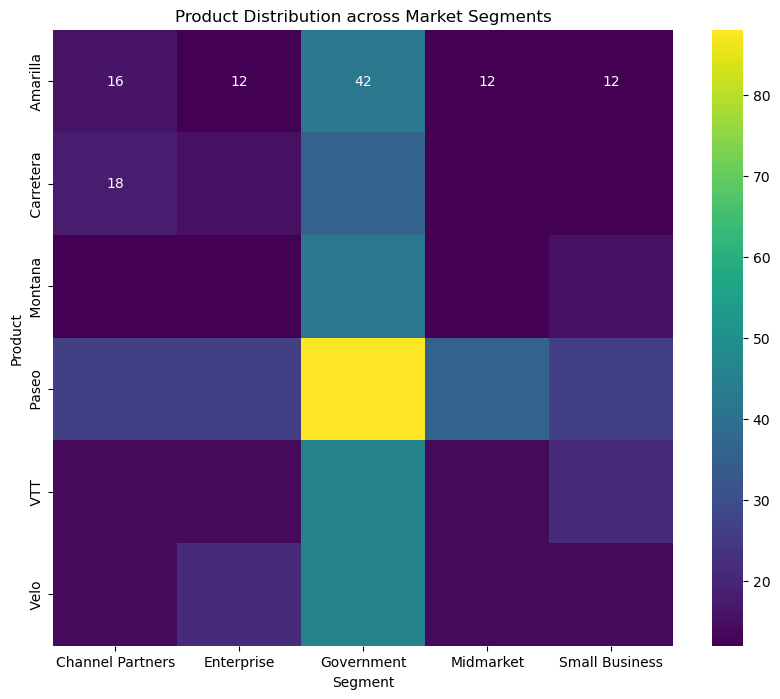

In [53]:
# Create a cross-tabulation of 'Product' and 'Segment'
product_segment_crosstab = pd.crosstab(df['Product'], df['Segment'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Product Distribution across Market Segments')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12736\1382602942.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i], label=product)


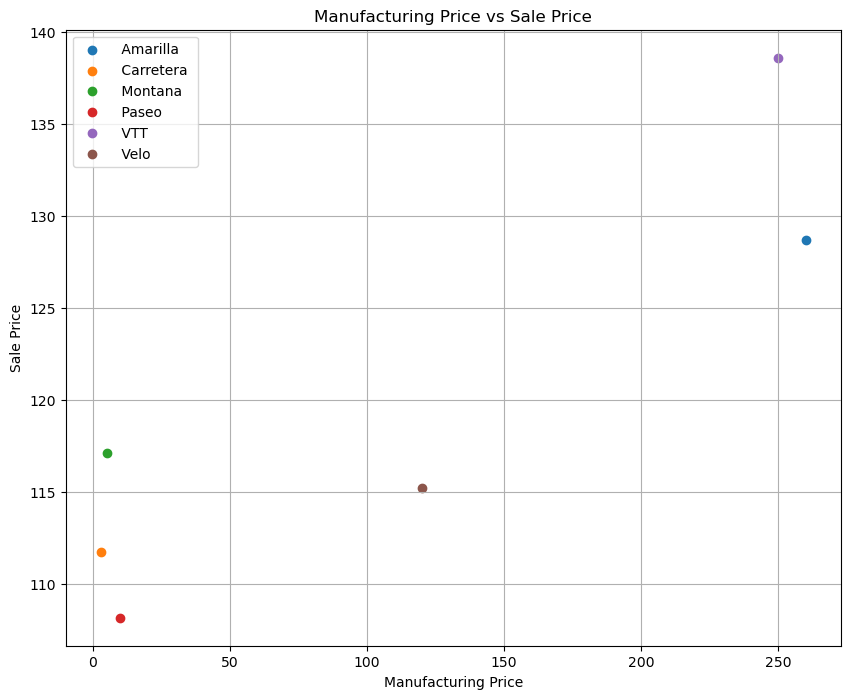

In [54]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each product
average_prices = df.groupby('Product').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Create a scatter plot of 'Manufacturing Price' vs 'Sale Price'
plt.figure(figsize=(10, 8))
for i, product in enumerate(average_prices.index):
    plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i], label=product)
plt.title('Manufacturing Price vs Sale Price')
plt.xlabel('Manufacturing Price')
plt.ylabel('Sale Price')
plt.legend()
plt.grid()
plt.show()

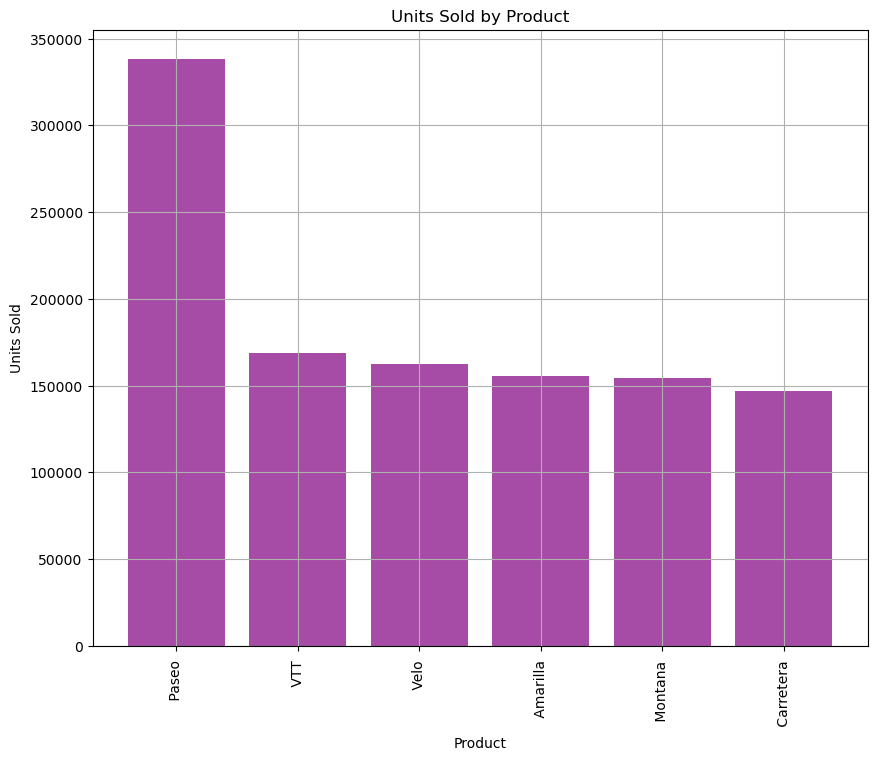

In [55]:
# Calculate total 'Units Sold' for each product
product_units_sold = df.groupby('Product').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
product_units_sold = product_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Product
plt.figure(figsize=(10, 8))
plt.bar(product_units_sold.index, product_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

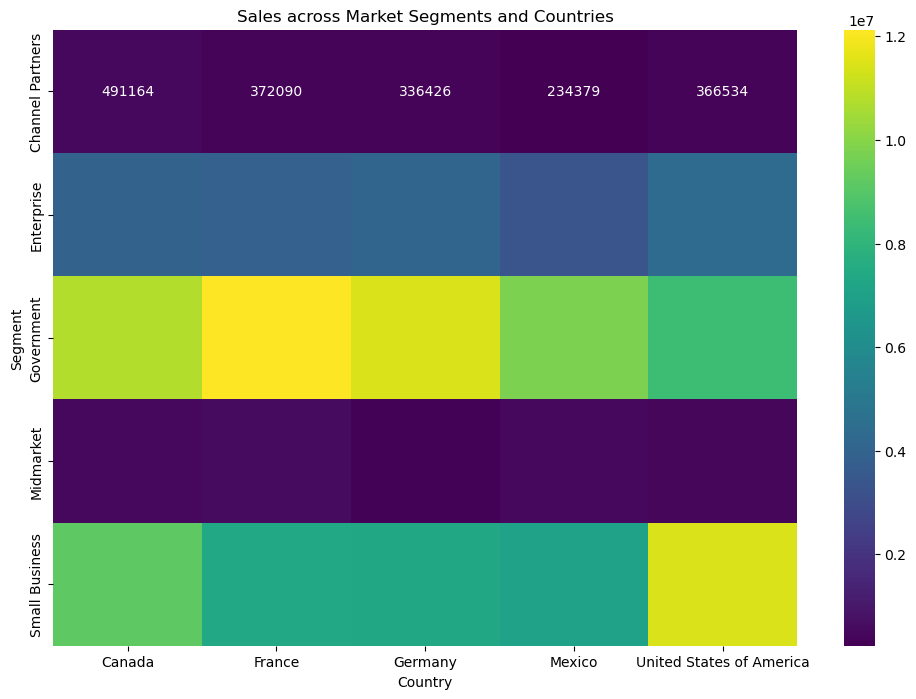

In [56]:
# Create a cross-tabulation of 'Segment' and 'Country' with 'Sales' as values
segment_country_sales = df.pivot_table(values='Sales', index='Segment', columns='Country', aggfunc='sum')

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(segment_country_sales, annot=True, fmt='.0f', cmap='viridis')
plt.title('Sales across Market Segments and Countries')
plt.show()


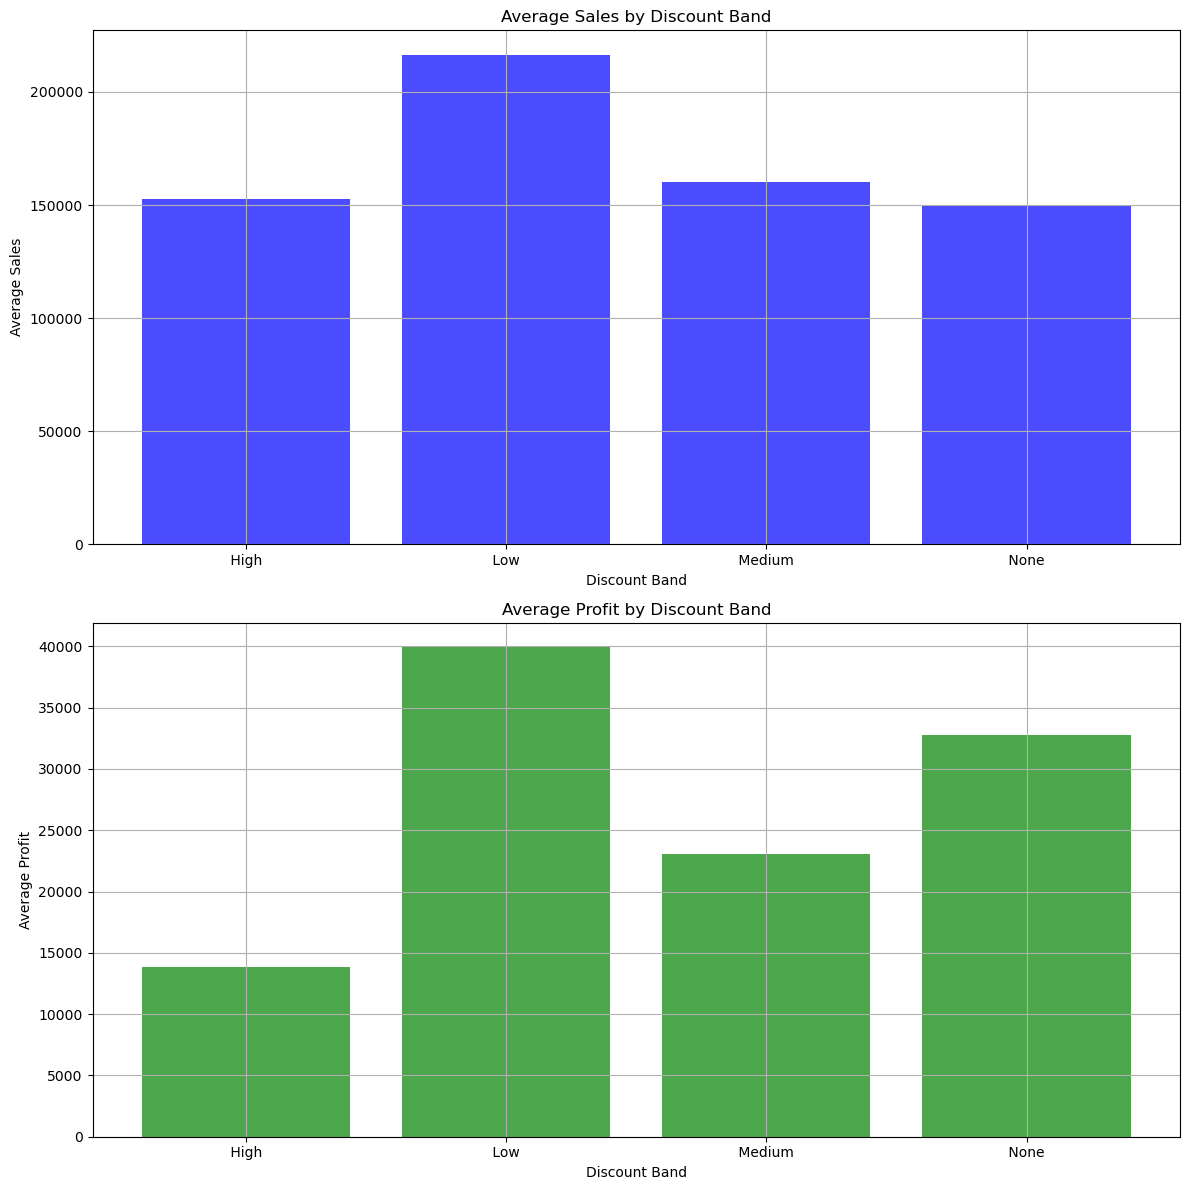

In [57]:
# Calculate average 'Sales' and 'Profit' for each 'Discount Band'
discount_band_averages = df.groupby('Discount Band').agg({'Sales': 'mean', 'Profit': 'mean'})

# Plot average 'Sales' and 'Profit' by 'Discount Band'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(discount_band_averages.index, discount_band_averages['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Average Sales by Discount Band')
ax[0].set_xlabel('Discount Band')
ax[0].set_ylabel('Average Sales')
ax[0].grid()

ax[1].bar(discount_band_averages.index, discount_band_averages['Profit'], color='green', alpha=0.7)
ax[1].set_title('Average Profit by Discount Band')
ax[1].set_xlabel('Discount Band')
ax[1].set_ylabel('Average Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

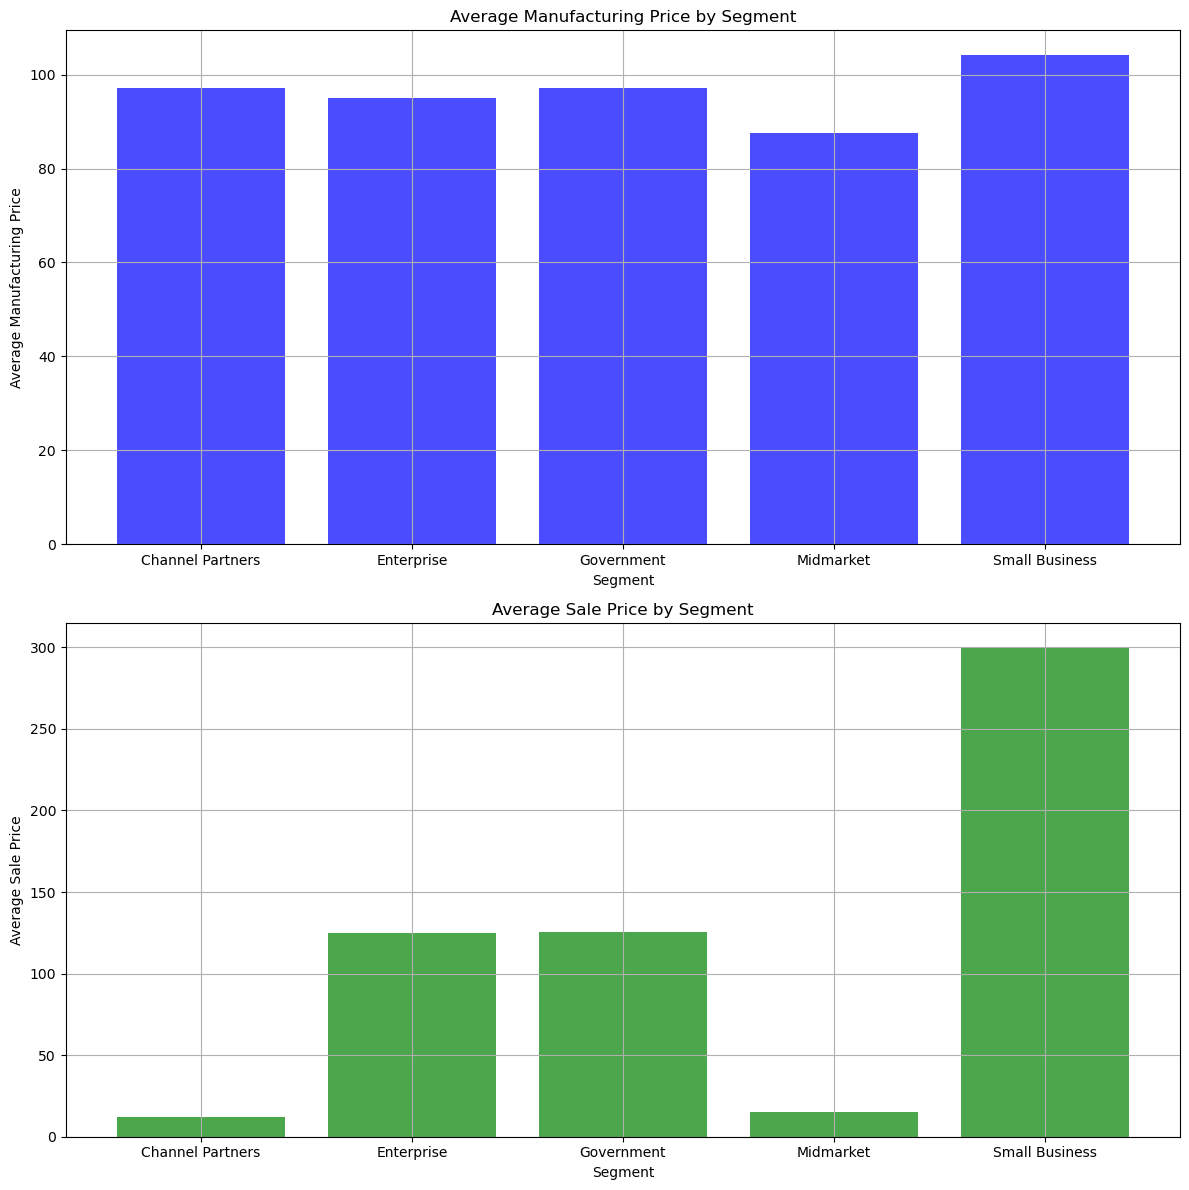

In [58]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each 'Segment'
segment_prices = df.groupby('Segment').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Plot average 'Manufacturing Price' and 'Sale Price' by 'Segment'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(segment_prices.index, segment_prices['Manufacturing Price'], color='blue', alpha=0.7)
ax[0].set_title('Average Manufacturing Price by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Average Manufacturing Price')
ax[0].grid()

ax[1].bar(segment_prices.index, segment_prices['Sale Price'], color='green', alpha=0.7)
ax[1].set_title('Average Sale Price by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Average Sale Price')
ax[1].grid()

plt.tight_layout()
plt.show()

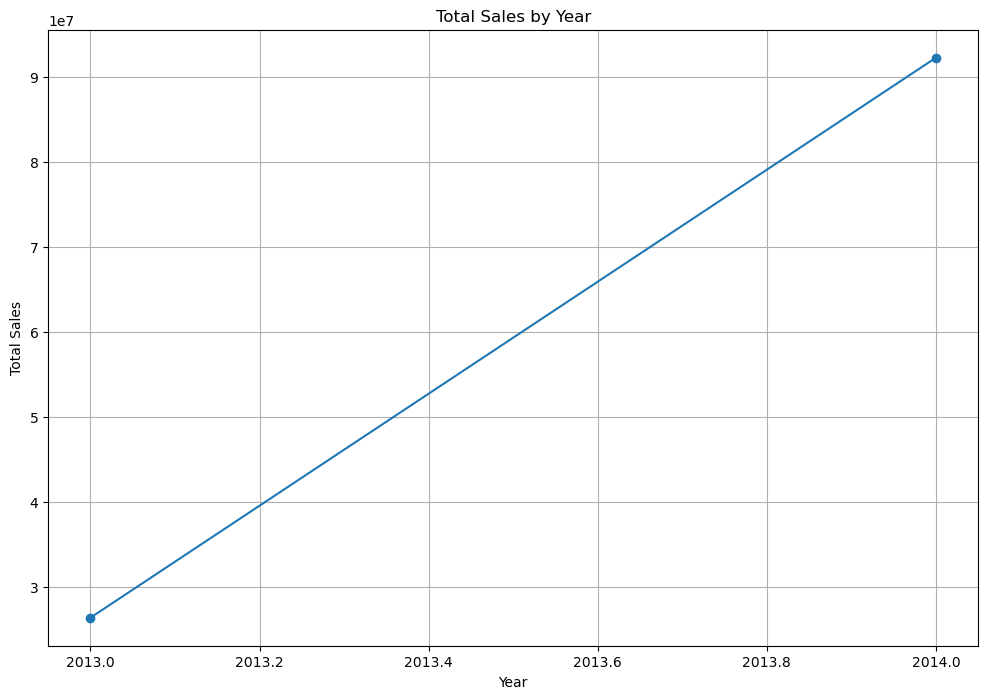

In [59]:
# Calculate total 'Sales' for each year
yearly_sales = df.groupby(df['Date'].dt.year).agg({'Sales': 'sum'})

# Plot total 'Sales' by year
plt.figure(figsize=(12, 8))
plt.plot(yearly_sales.index, yearly_sales['Sales'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

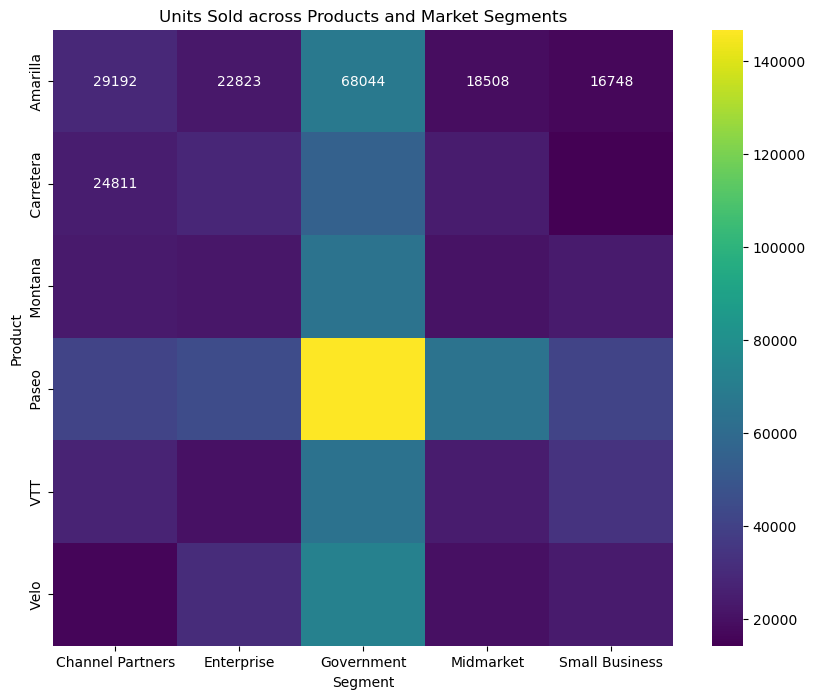

In [60]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Segment' as dimensions
product_segment_units = df.pivot_table(values='Units Sold', index='Product', columns='Segment', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Market Segments')
plt.show()

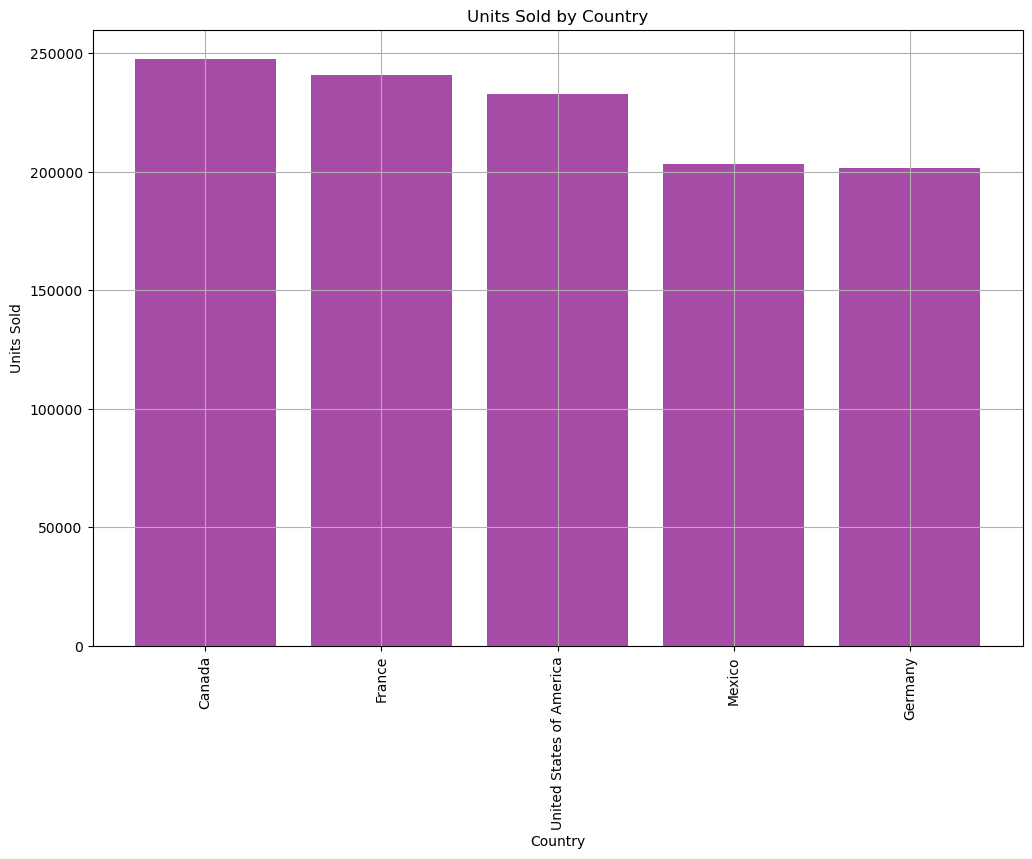

In [61]:

# Calculate total 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

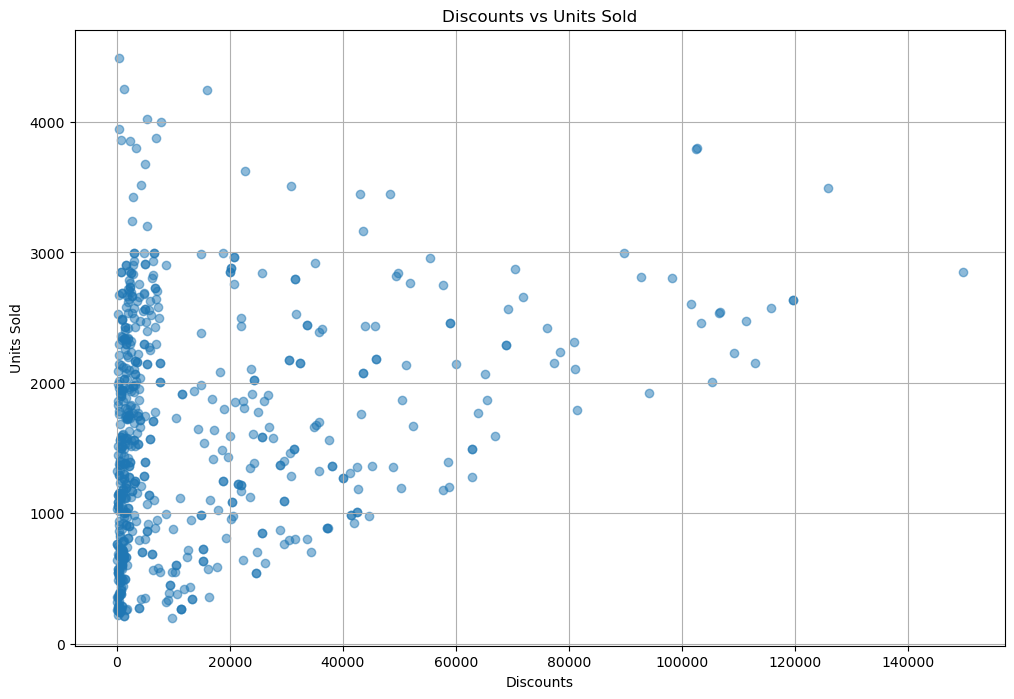

In [62]:
# Create a scatter plot of 'Discounts' vs 'Units Sold'
plt.figure(figsize=(12, 8))
plt.scatter(df['Discounts'], df['Units Sold'], alpha=0.5)
plt.title('Discounts vs Units Sold')
plt.xlabel('Discounts')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

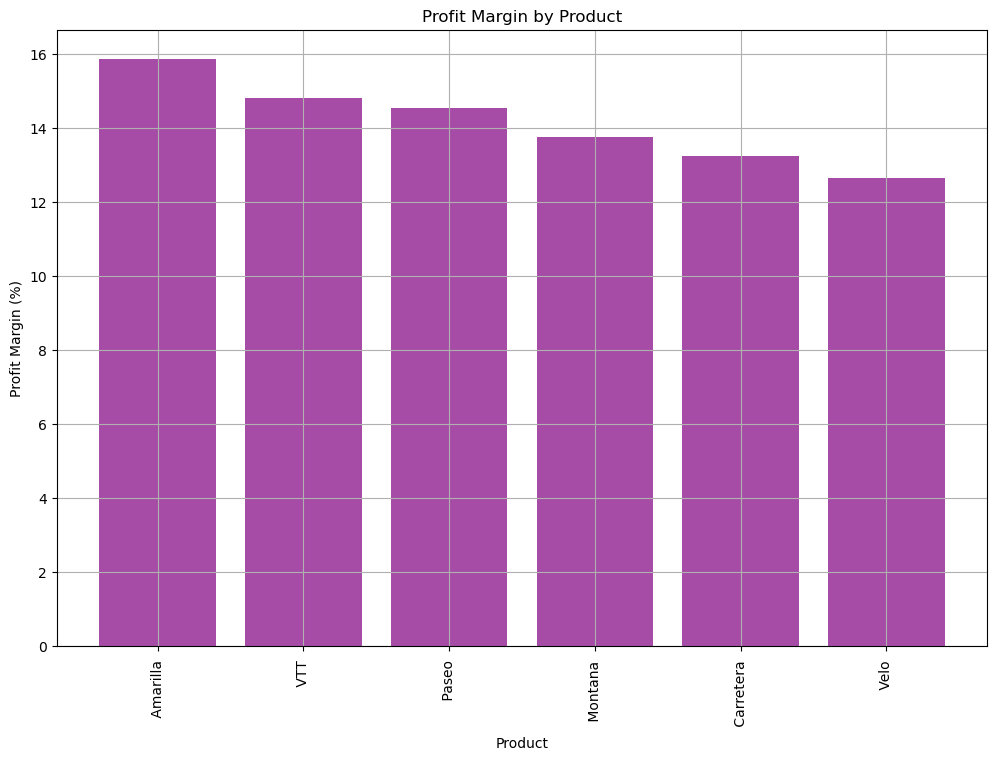

In [63]:
# Calculate profit margin for each product
product_profit_margin = df.groupby('Product').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)

# Plot profit margin by product
plt.figure(figsize=(12, 8))
plt.bar(product_profit_margin.index, product_profit_margin, color='purple', alpha=0.7)
plt.title('Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

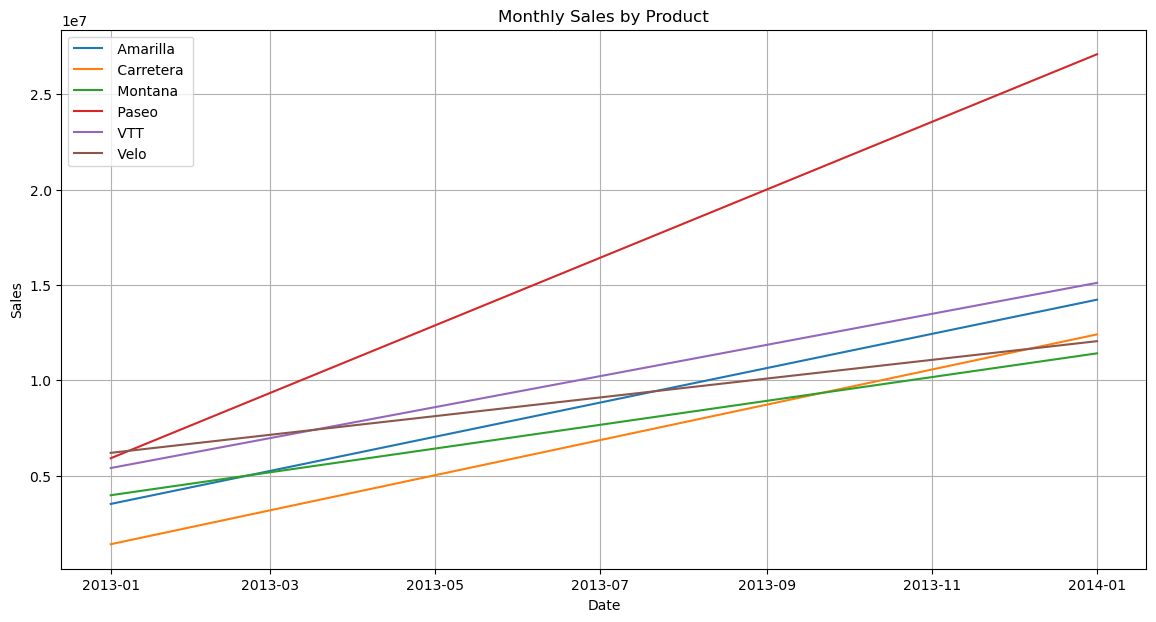

In [64]:
# Create a new dataframe with total monthly sales for each product
monthly_product_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Sales': 'sum'})
monthly_product_sales.index.names = ['Year', 'Month', 'Product']
monthly_product_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_sales['Year-Month'] = pd.to_datetime(monthly_product_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_sales['Product'].unique():
    product_data = monthly_product_sales[monthly_product_sales['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Sales'], label=product)
plt.title('Monthly Sales by Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

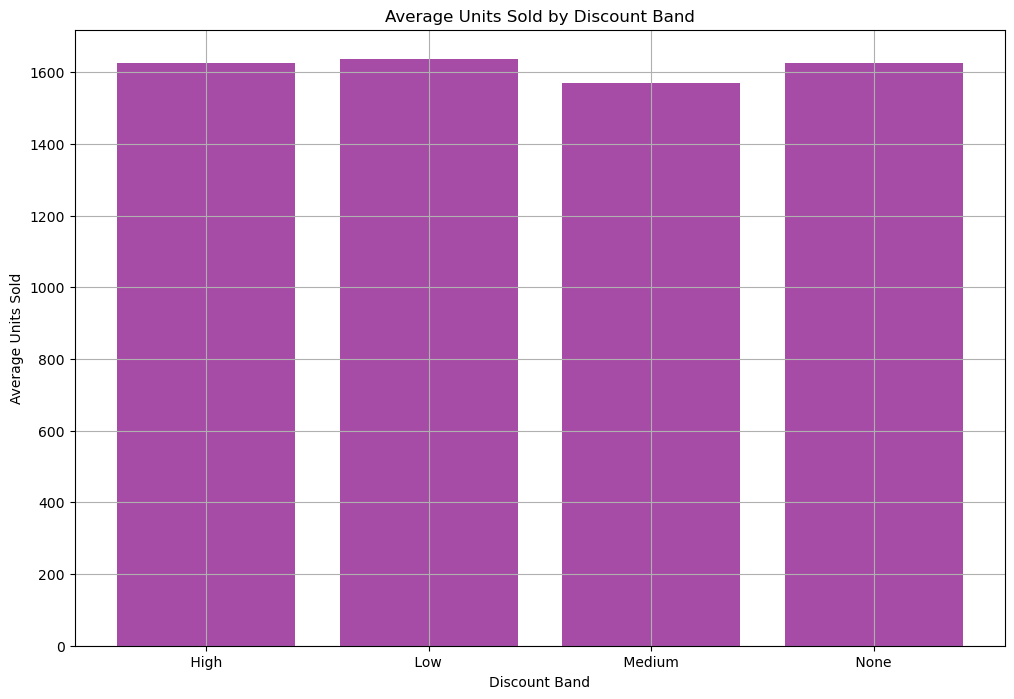

In [66]:
# Calculate average 'Units Sold' for each 'Discount Band'
discount_band_units = df.groupby('Discount Band').agg({'Units Sold': 'mean'})

# Plot average 'Units Sold' by 'Discount Band'
plt.figure(figsize=(12, 8))
plt.bar(discount_band_units.index, discount_band_units['Units Sold'], color='purple', alpha=0.7)
plt.title('Average Units Sold by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Average Units Sold')
plt.grid()
plt.show()

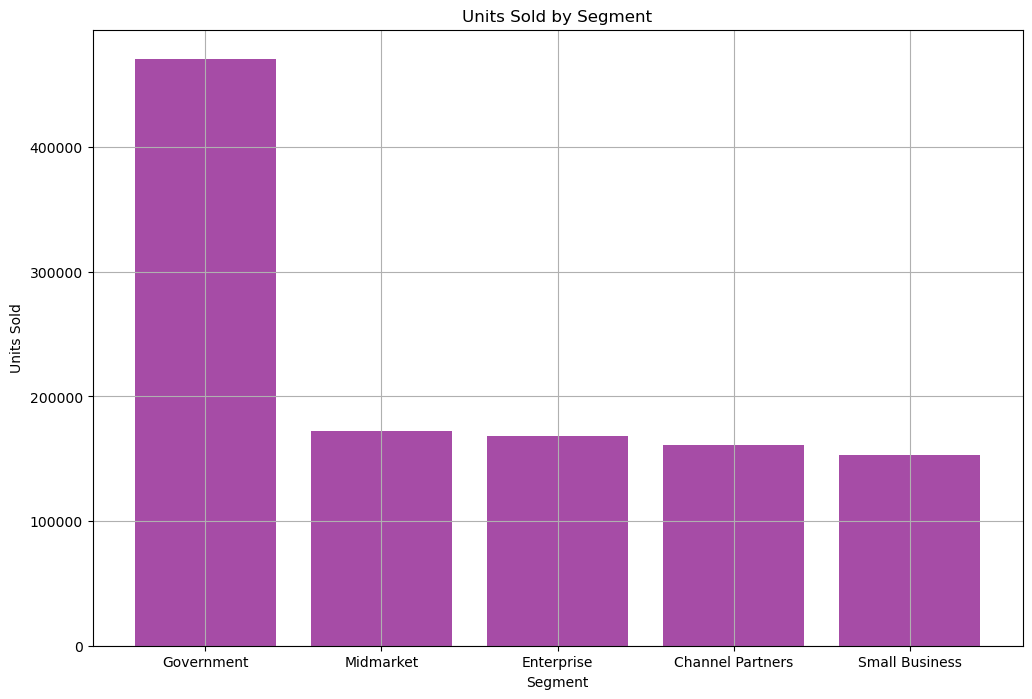

In [67]:
# Calculate total 'Units Sold' for each 'Segment'
segment_units_sold = df.groupby('Segment').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
segment_units_sold = segment_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Segment
plt.figure(figsize=(12, 8))
plt.bar(segment_units_sold.index, segment_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Units Sold by Segment')
plt.xlabel('Segment')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

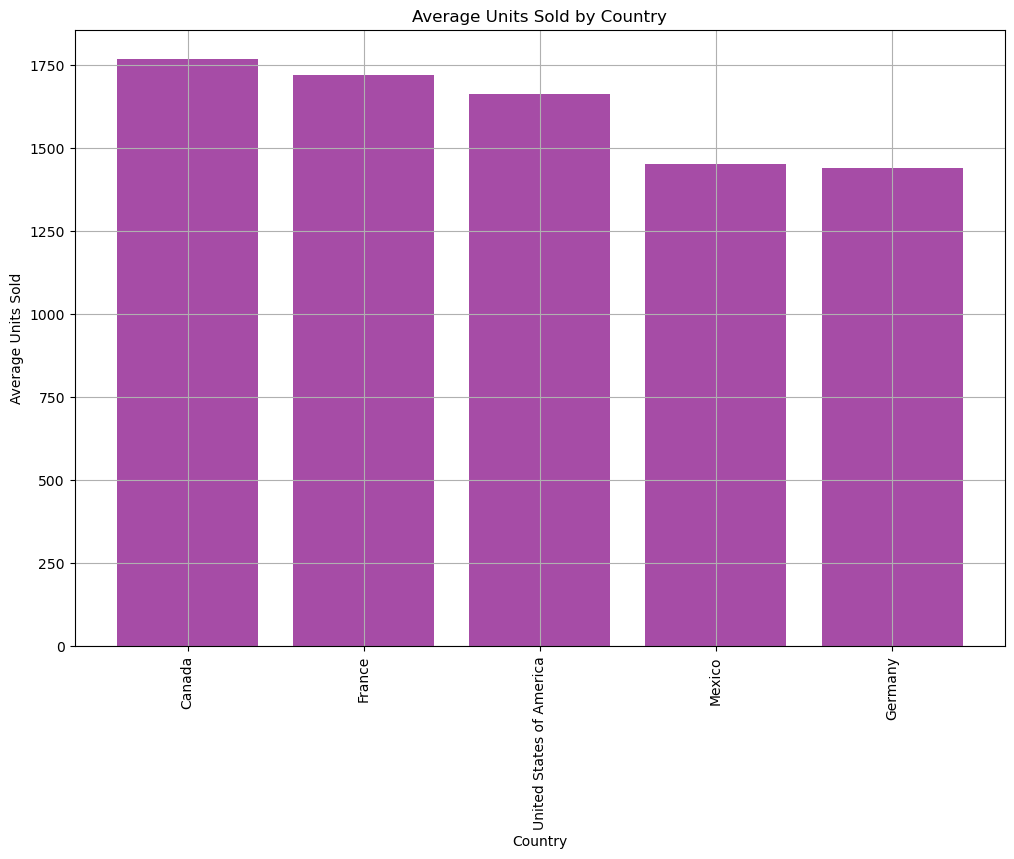

In [68]:
# Calculate average 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'mean'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Average Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

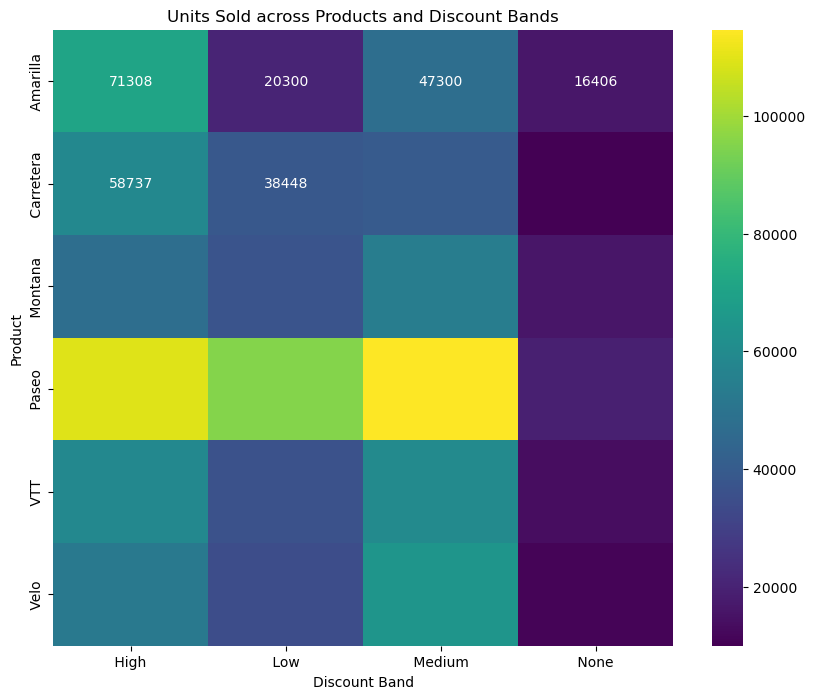

In [69]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Discount Band' as dimensions
product_discount_units = df.pivot_table(values='Units Sold', index='Product', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_discount_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Discount Bands')
plt.show()


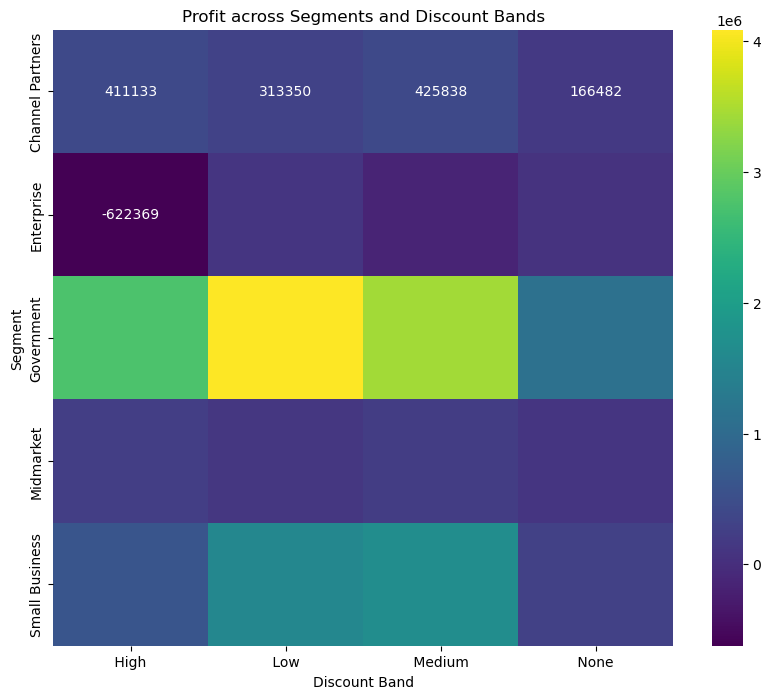

In [70]:
# Create a pivot table of 'Profit' with 'Segment' and 'Discount Band' as dimensions
segment_discount_profit = df.pivot_table(values='Profit', index='Segment', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(segment_discount_profit, annot=True, fmt='.0f', cmap='viridis')
plt.title('Profit across Segments and Discount Bands')
plt.show()

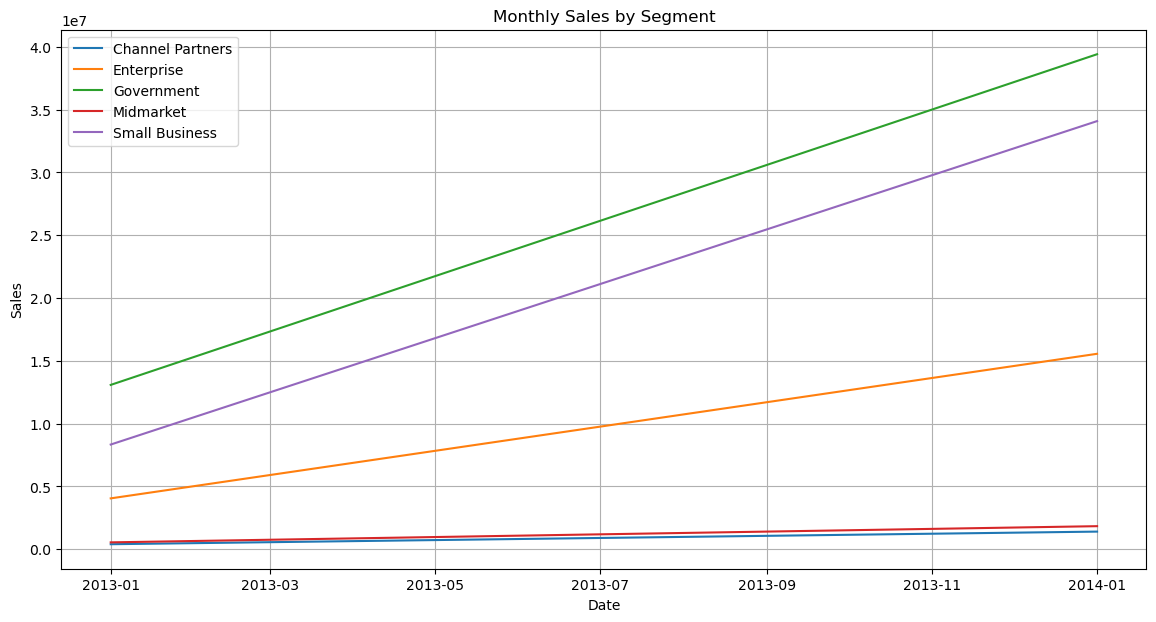

In [71]:
# Create a new dataframe with total monthly sales for each segment
monthly_segment_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Sales': 'sum'})
monthly_segment_sales.index.names = ['Year', 'Month', 'Segment']
monthly_segment_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_sales['Year-Month'] = pd.to_datetime(monthly_segment_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_sales['Segment'].unique():
    segment_data = monthly_segment_sales[monthly_segment_sales['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Sales'], label=segment)
plt.title('Monthly Sales by Segment')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()